Means:
Control        2463.166667
EMG forearm    2488.600000
EMG leg        2405.400000
dtype: float64

Standard Deviations:
Control        756.286986
EMG forearm    516.851716
EMG leg        626.032201
dtype: float64

Pairwise t-test p-values:
Keyboard vs. Arm EMG: p-value=0.8797
Keyboard vs. Leg EMG: p-value=0.7484
Arm EMG vs. Leg EMG: p-value=0.5767


/Users/paulweger/opt/anaconda3/envs/i2dl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/paulweger/opt/anaconda3/envs/i2dl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/paulweger/opt/anaconda3/envs/i2dl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


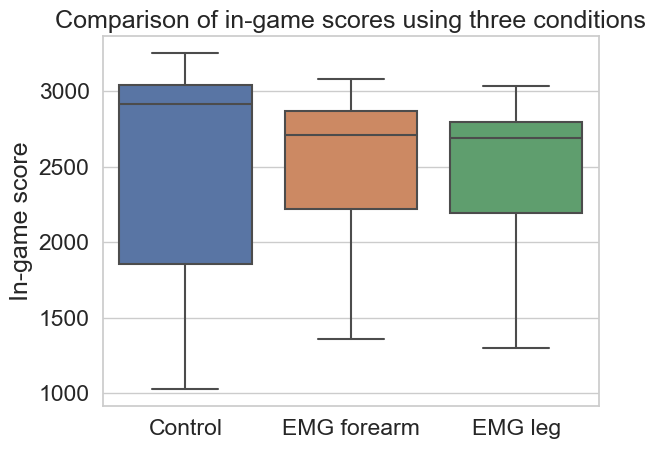

In [46]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Excel data into a DataFrame
# Replace 'your_data.xlsx' with the actual filename of your Excel file
df = pd.read_excel('your_data.xlsx')
df = pd.DataFrame(df)
df = df.drop(columns=['Trial #','Blind/Primer','VP','Unnamed: 6'])
df.rename(columns={'keyboard': 'Control', 'EMG_flexor carpi radialis': 'EMG forearm', 'EMG_tibialis_anterior ': 'EMG leg'}, inplace=True)

# Extract data from relevant columns
keyboard_condition = df['Control']
arm_condition = df['EMG forearm']
leg_condition = df['EMG leg']

# Calculate means and standard deviations
means = df.mean()
std_devs = df.std()

# Perform pairwise t-tests
p_value_keyboard_arm = stats.ttest_ind(keyboard_condition, arm_condition).pvalue
p_value_keyboard_leg = stats.ttest_ind(keyboard_condition, leg_condition).pvalue
p_value_arm_leg = stats.ttest_ind(arm_condition, leg_condition).pvalue

# Display results
print("Means:")
print(means)
print("\nStandard Deviations:")
print(std_devs)
print("\nPairwise t-test p-values:")
print(f"Keyboard vs. Arm EMG: p-value={p_value_keyboard_arm:.4f}")
print(f"Keyboard vs. Leg EMG: p-value={p_value_keyboard_leg:.4f}")
print(f"Arm EMG vs. Leg EMG: p-value={p_value_arm_leg:.4f}")

# Check for significance (you may adjust the significance level)
alpha = 0.05

# Plotting
sns.set(style="whitegrid",font_scale=1.5)
sns.boxplot(data=df,showfliers=False)


plt.title('Comparison of in-game scores using three conditions')
plt.ylabel('In-game score',fontsize=18)

plt.savefig('your_figure.png', dpi=300, bbox_inches='tight')

In [22]:
print(df.columns)

Index(['keyboard', 'EMG_flexor carpi radialis', 'EMG_tibialis_anterior '], dtype='object')
